### FNN and QCED optimizers

In [1]:
from qubo_solver import fnn_solve, QCED_solve
import numpy as np

# Load the data
import pickle

inputFile = "../QUBO_Data/15_QUBO_instances.data"
fd = open(inputFile, "rb")
data = pickle.load(fd)

# Example 15-variable random QUBO matrix
Q = data[0][0]
min_cost = data[1][0]
print(f"minimal cost: {min_cost}")

# FNN
print("\n")
print("FNN optimizer: \n ----------------- \n")
cost, best_sol = fnn_solve([Q], 7, [min_cost])

# QCED
coords = np.zeros((4, 2))
for i in range(4):
    coords[i, 0] = i % 2
    coords[i, 1] = i // 2
q_resource = {"q": 4, "T": 1000, "coords": coords, "omega_max": 0.01, "delta_max": 1}

print("\n")
print("QCED optimizer: \n ----------------- \n")
result = QCED_solve(Q, q_resource, num_epochs=50)

minimal cost: -196.32272338867188


FNN optimizer: 
 ----------------- 

fnn loss: -196.32273864746094
annealing round: 1/10
annealing round: 2/10
annealing round: 3/10
annealing round: 4/10
annealing round: 5/10
annealing round: 6/10
annealing round: 7/10
annealing round: 8/10
annealing round: 9/10
annealing round: 10/10
instance: 1/1, percentage error=7.772298997855312e-06


QCED optimizer: 
 ----------------- 

epoch 10: Loss = -196.32275390625
epoch 20: Loss = -196.32275390625
epoch 30: Loss = -196.32275390625
epoch 40: Loss = -196.32275390625
epoch 50: Loss = -196.32275390625
Solution: [1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
QUBO cost: -196.32275390625
Solving time: 110.2450921535492s


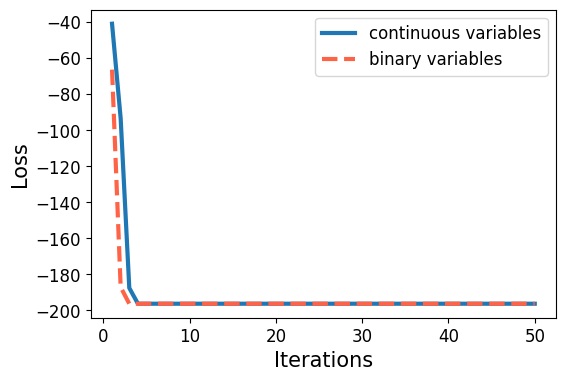

In [2]:
# visualize QCED learning curve
from qubo_solver import plot_learning_curve

plot_learning_curve(result)

### QCED_digital optimizer

QCED_digital optimizer: 
 ----------------- 

epoch 10: Loss = -1.5544597995710623e-05%
epoch 20: Loss = -1.5544597995710623e-05%
epoch 30: Loss = -1.5544597995710623e-05%
epoch 40: Loss = -1.5544597995710623e-05%
epoch 50: Loss = -1.5544597995710623e-05%
Solution: [1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
QUBO cost: -196.32275390625
Percentage Error: 1.5544597995710623e-05%
Solving time: 2.056736707687378s


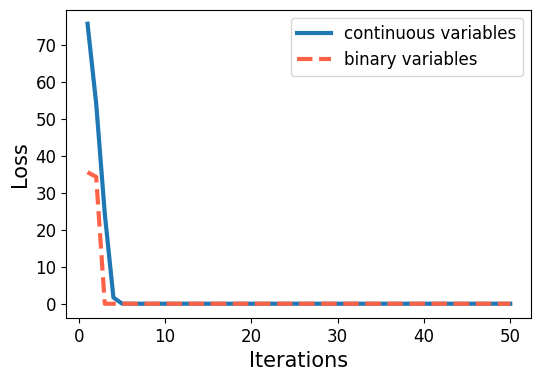

In [2]:
from qubo_solver import QCED_digital_solve

print("QCED_digital optimizer: \n ----------------- \n")
result = QCED_digital_solve(Q, Q_sol=min_cost, num_epochs=50)
plot_learning_curve(result)

### Gurobi and D-Wave optimizers

In [ ]:
from qubo_solver import gurobi_solve, dwave_solve

# Gurobi
cost, best_sol = gurobi_solve(Q)
print(
    f"percentage error: {100 * abs((cost - min_cost) / (min_cost))}\n solution vector: {best_sol}"
)

# D-Wave (API token required)
token = "D-Wave API token"
cost, best_sol = dwave_solve(Q, token)
print(
    f"percentage error: {100 * abs((cost - min_cost) / (min_cost))}\n solution vector: {best_sol}"
)